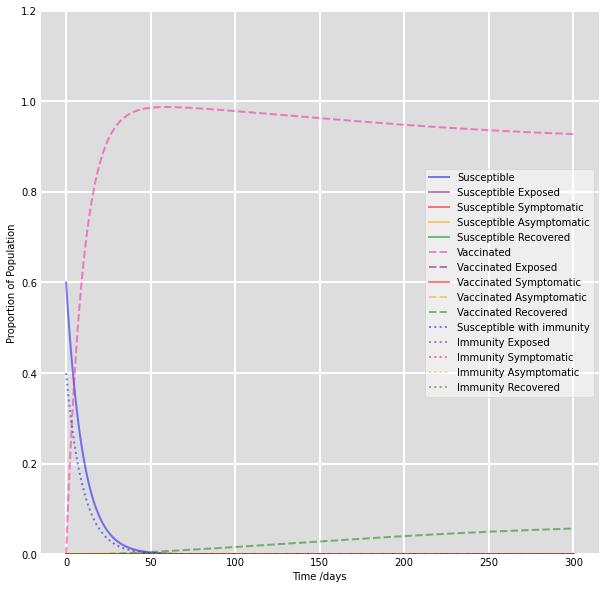

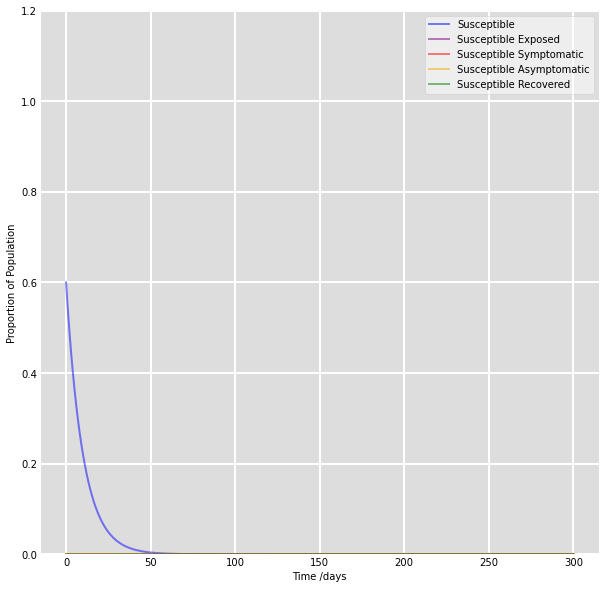

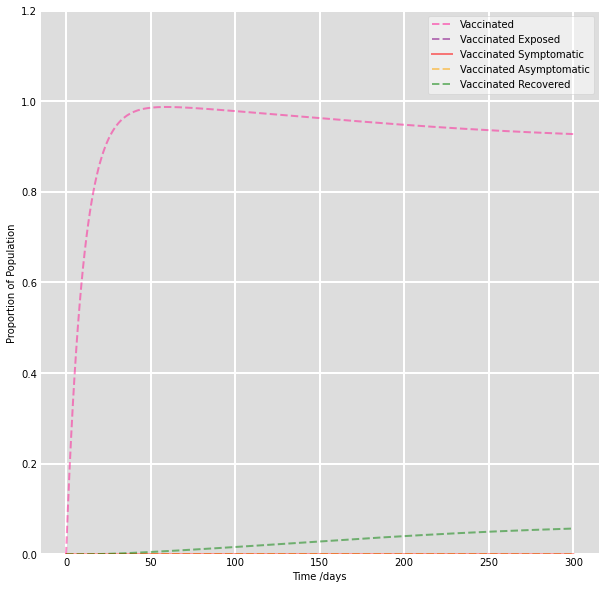

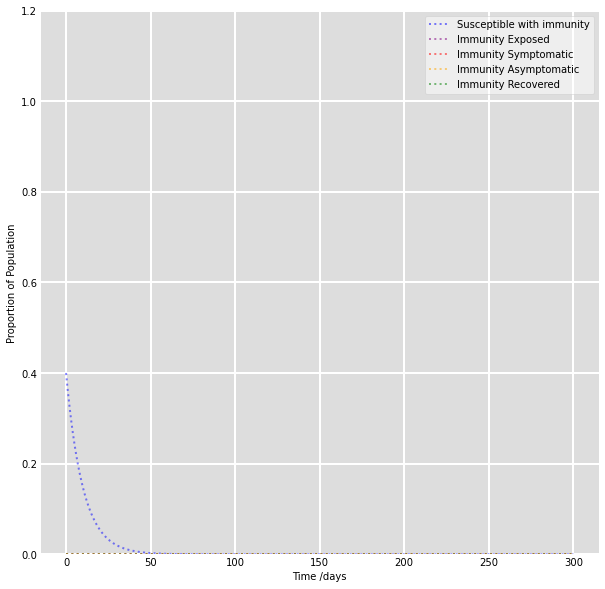

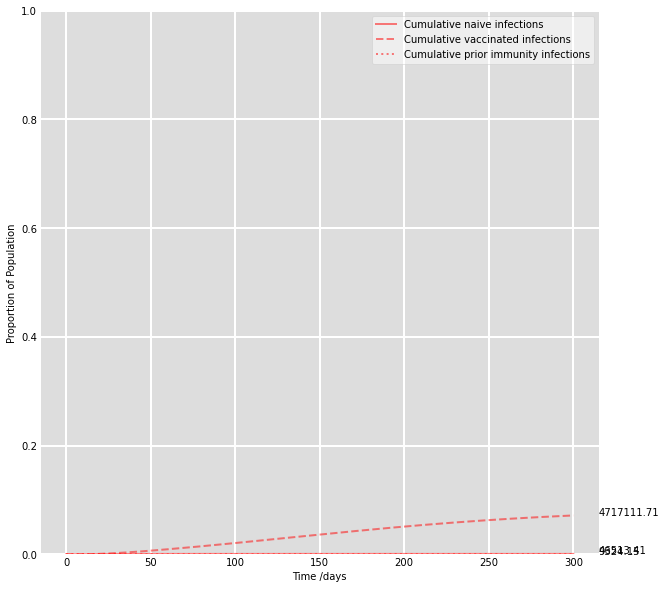

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial number of all compartment
S0 = 39599400
V0 = 0
S_i0 = 26399600
E_s0 = 0
E_v0 = 0
E_i0 = 0
I_s0 = 1000
I_v0 = 0
I_i0 = 0
A_s0 = 0
A_v0 = 0
A_i0 = 0
R_s0 = 0
R_v0 = 0
R_i0 = 0
C_s0 = 0
C_v0 = 0
C_i0 = 0

# N is the sum of all the compartments
N = S0 + V0 + S_i0 + E_s0 + E_v0 + E_i0 + I_s0 + I_v0 + I_i0 + A_s0 + A_v0 + A_i0 + R_s0 + R_v0 + R_i0

# Definitions of parameters
beta = 1.5
kappa = 0.71
alpha = 0.26
eta = 0.26
delta_i = 1
delta_v = 1
delta_a = 0.2
s_i = 0.3
s_v = 0.5
p = 0.75
q = 0.25
l = 0.2
epsilon = 0.1

# A grid of time points (in days)
t = np.linspace(0, 300, 300)

# The SIR model differential equations.
def deriv(y, t, N, beta, kappa, alpha, epsilon, eta,  delta_i, delta_v, delta_a, s_i, s_v, p, q, l):
    S, V, S_i, E_s, E_v, E_i, I_s, I_v, I_i, A_s, A_v, A_i, R_s, R_v, R_i, C_s0, C_v0, C_i0 = y
    Lambda = beta * I_s / N + beta * delta_a * A_s / N + beta * delta_v * I_v / N + beta * delta_v * delta_a * A_v / N + beta * delta_i * I_i / N + beta * delta_i * delta_a * A_i / N
    dSdt = - Lambda * S - epsilon * S
    dVdt = - s_v * Lambda * V + epsilon * S + epsilon * S_i
    dS_idt = - s_i * Lambda * S_i - epsilon * S_i
    dE_sdt = Lambda * S - kappa * E_s - epsilon * E_s
    dE_vdt = s_v * Lambda * V - kappa * E_v + epsilon * E_s + epsilon * E_i
    dE_idt = s_i * Lambda * S_i - kappa * E_i - epsilon * E_i
    dI_sdt = p * kappa * E_s - alpha * I_s
    dI_vdt = q * kappa * E_v - alpha * I_v
    dI_idt = l * kappa * E_i - alpha * I_i
    dA_sdt = (1-p) * kappa * E_s - eta * A_s - epsilon * A_s
    dA_vdt = (1-q) * kappa * E_v - eta * A_v - epsilon * A_v
    dA_idt = (1-l) * kappa * E_i - eta * A_i - epsilon * A_i
    dR_sdt = alpha * I_s + eta * A_s - epsilon * R_s
    dR_vdt = alpha * I_v + eta * A_v + epsilon * R_s + epsilon * R_i
    dR_idt = alpha * I_i + eta * A_i - epsilon * R_i
    dC_sdt = Lambda * S
    dC_vdt = s_v * Lambda * V
    dC_idt = s_i * Lambda * S_i
    return dSdt, dVdt, dS_idt, dE_sdt, dE_vdt, dE_idt, dI_sdt, dI_vdt, dI_idt, dA_sdt, dA_vdt, dA_idt, dR_sdt, dR_vdt, dR_idt, dC_sdt, dC_vdt, dC_idt

# Initial conditions vector
y0 = S0, V0, S_i0, E_s0, E_v0, E_i0, I_s0, I_v0, I_i0, A_s0, A_v0, A_i0, R_s0, R_v0, R_i0, C_s0, C_v0, C_s0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, kappa, alpha, epsilon, eta, delta_i, delta_v, delta_a, s_i, s_v, p, q, l))
S, V, S_i, E_s, E_v, E_i, I_s, I_v, I_i, A_s, A_v, A_i, R_s, R_v, R_i, C_s, C_v, C_i = ret.T

# Plot the data on separate curves. 
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'blue', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E_s/N, 'purple', alpha=0.5, lw=2, label= 'Susceptible Exposed')
ax.plot(t, I_s/N, 'red', alpha=0.5, lw=2, label= 'Susceptible Symptomatic')
ax.plot(t, A_s/N, 'orange', alpha = 0.5, lw=2, label = 'Susceptible Asymptomatic')
ax.plot(t, R_s/N, 'green', alpha = 0.5, lw=2, label = 'Susceptible Recovered')
ax.plot(t, V/N, 'deeppink', alpha=0.5, lw=2,linestyle = "--", label='Vaccinated')
ax.plot(t, E_v/N, 'purple', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Exposed')
ax.plot(t, I_v/N, 'red', alpha=0.5, lw=2, label= 'Vaccinated Symptomatic')
ax.plot(t, A_v/N, 'orange', alpha = 0.5, lw=2, linestyle = "--", label = 'Vaccinated Asymptomatic')
ax.plot(t, R_v/N, 'green', alpha = 0.5, lw=2, linestyle = "--", label = 'Vaccinated Recovered')
ax.plot(t, S_i/N, 'blue', alpha=0.5, lw=2, linestyle = "dotted", label='Susceptible with immunity')
ax.plot(t, E_i/N, 'purple', alpha=0.5, lw=2, linestyle = "dotted", label= 'Immunity Exposed')
ax.plot(t, I_i/N, 'red', alpha=0.5, lw=2, linestyle = "dotted", label= 'Immunity Symptomatic')
ax.plot(t, A_i/N, 'orange', alpha = 0.5, lw=2, linestyle = "dotted", label = 'Immunity Asymptomatic')
ax.plot(t, R_i/N, 'green', alpha = 0.5, lw=2, linestyle = "dotted", label = 'Immunity Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'blue', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E_s/N, 'purple', alpha=0.5, lw=2, label= 'Susceptible Exposed')
ax.plot(t, I_s/N, 'red', alpha=0.5, lw=2, label= 'Susceptible Symptomatic')
ax.plot(t, A_s/N, 'orange', alpha = 0.5, lw=2, label = 'Susceptible Asymptomatic')
ax.plot(t, R_s/N, 'green', alpha = 0.5, lw=2, label = 'Susceptible Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, V/N, 'deeppink', alpha=0.5, lw=2,linestyle = "--", label='Vaccinated')
ax.plot(t, E_v/N, 'purple', alpha=0.5, lw=2, linestyle = "--", label= 'Vaccinated Exposed')
ax.plot(t, I_v/N, 'red', alpha=0.5, lw=2, label= 'Vaccinated Symptomatic')
ax.plot(t, A_v/N, 'orange', alpha = 0.5, lw=2, linestyle = "--", label = 'Vaccinated Asymptomatic')
ax.plot(t, R_v/N, 'green', alpha = 0.5, lw=2, linestyle = "--", label = 'Vaccinated Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S_i/N, 'blue', alpha=0.5, lw=2, linestyle = "dotted", label='Susceptible with immunity')
ax.plot(t, E_i/N, 'purple', alpha=0.5, lw=2, linestyle = "dotted", label= 'Immunity Exposed')
ax.plot(t, I_i/N, 'red', alpha=0.5, lw=2, linestyle = "dotted", label= 'Immunity Symptomatic')
ax.plot(t, A_i/N, 'orange', alpha = 0.5, lw=2, linestyle = "dotted", label = 'Immunity Asymptomatic')
ax.plot(t, R_i/N, 'green', alpha = 0.5, lw=2, linestyle = "dotted", label = 'Immunity Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, C_s/N, 'red', alpha=0.5, lw=2, label='Cumulative naive infections')
ax.plot(t, C_v/N, 'red', alpha=0.5, lw=2, linestyle = "--", label= 'Cumulative vaccinated infections')
ax.plot(t, C_i/N, 'red', alpha=0.5, lw=2, linestyle = "dotted", label= 'Cumulative prior immunity infections')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of Population')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
for var in (C_s, C_v, C_i):
    ax.annotate('%0.2f' % var.max(), xy=(1, var.max()/N ), xytext=(0, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()